In [1]:
# %matplotlib ipympl
import h5py 
import numpy as np 
import matplotlib.pyplot as plt 
import sys
import nexusformat.nexus as nx

In [2]:
filename_events_Dscale1= "/Users/fumiaki/Documents/ORNL/Research/PTX3_Analysis/Data/ambient_light/navitarlensminclustersize_1_dscale1.h5"
filename_events_Dscale4= "/Users/fumiaki/Documents/ORNL/Research/PTX3_Analysis/Data/ambient_light/Su_Ann/navitar_events.h5"
# filename_hits = "/Users/fumiaki/Documents/ORNL/Research/PTX3_Analysis/Data/ambient_light/hits_navitarlensminclustersize_1.h5"
f = nx.nxload(filename_events_Dscale1)
print(f.tree)
ff = nx.nxload(filename_events_Dscale4)
print(ff.tree)

root:NXroot
  events:NXgroup
    NHits = int32(24338647)
    tof_ns = float64(24338647)
    tot = float64(24338647)
    x = float64(24338647)
    y = float64(24338647)
root:NXroot
  events:NXgroup
    NHits = int32(24338647)
    tof_ns = float64(24338647)
    tot = float64(24338647)
    x = float64(24338647)
    y = float64(24338647)


In [3]:
with h5py.File(filename_events_Dscale4) as h5f:
#     x = h5f["events/x"][:]
#     y = h5f["events/y"][:]
    tot_Co_events = h5f["events/x"][:]

/Users/fumiaki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'TOT')

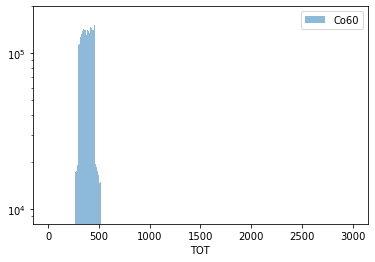

In [4]:
plt.figure()
# _ = plt.hist(tot_neutron_events, 1500,range=[0, 1500],alpha = 0.5, label='Neutron' )
_ = plt.hist(tot_Co_events, 3000,range=[0, 3000],alpha = 0.5, label='Co60' )
# _ = plt.hist(tot_Am_events, 1500,range=[0, 1500],alpha = 0.5, label='Am' )
# _ = plt.hist(tot_Aftergrow_events, 120,range=[0, 120],alpha = 0.3, label='After glow' )
# _ = plt.hist(tot_Back_events, 1500,range=[0, 1500],alpha = 0.3, label='Background')
# _ = plt.hist(nhits_5, 120,range=[0, 120],alpha = 0.3, label='After glow(16 h later)' )

plt.yscale('log', nonposy='clip')
plt.legend(loc='upper right')
plt.xlabel("TOT")

In [5]:
with h5py.File(filename_events_Dscale4) as h5f:
    x = h5f["events/x"][:]
    y = h5f["events/y"][:]
    tof_ns = h5f["events/tof_ns"][:]
    nhits = h5f["events/NHits"][:]

/Users/fumiaki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """Entry point for launching an IPython kernel.


## Plot data after centroiding

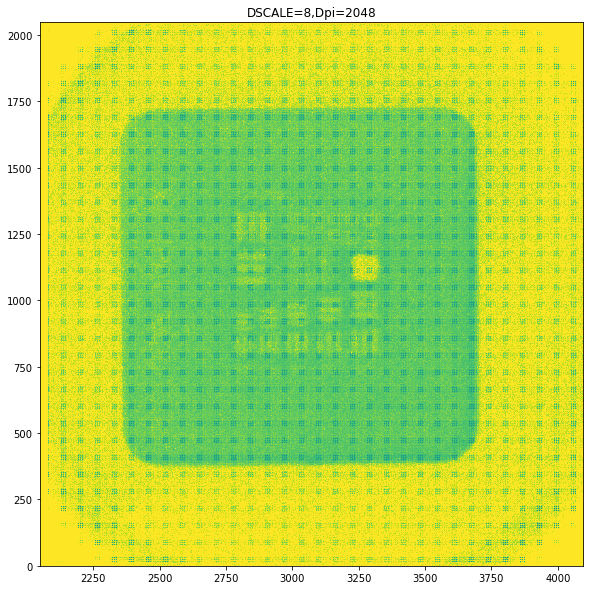

In [6]:
DSCALE = 8
binsize = 256*DSCALE
DPI=2048
xedges = np.linspace(binsize, binsize*2, binsize+1)
yedges = np.linspace(0, binsize, binsize+1)

H, xedges, yedges = np.histogram2d(x*DSCALE, y*DSCALE, bins=(xedges, yedges))

H = H.T

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(
#     H,
    -np.log(H+1),
    interpolation='nearest',
    origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
    cmap="viridis",  
)
ax.set_title(f"DSCALE={DSCALE},Dpi={DPI}")
fig.savefig(f'filename_dpi{DPI}_DSCALE{DSCALE}.png',dpi=2048)

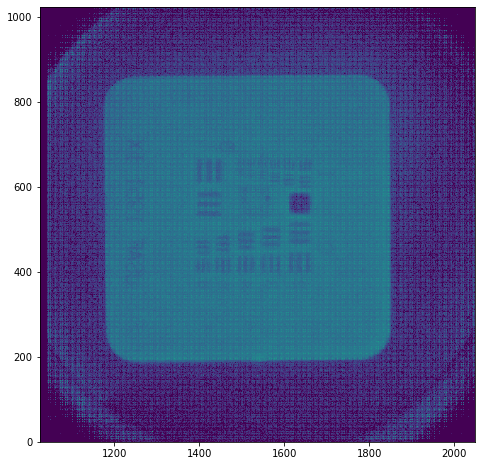

In [91]:
binsize=256*4
xedges = np.linspace(256*4, 256*8, binsize+1)
yedges = np.linspace(0, 256*4, binsize+1)
H, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges))
H = H.T
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(
#     H,
     np.log(H+1),
#         vmin=1, vmax=10,
    interpolation='nearest',
    origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
     cmap='viridis',
#     cmap="gray",
)

In [18]:
with h5py.File(filename_hits) as h5f:
    x = h5f["hits/x"][:]
    y = h5f["hits/y"][:]
    tof_ns = h5f["hits/tof_ns"][:]
#     nhits = h5f["events/NHits"][:]

/Users/fumiaki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """Entry point for launching an IPython kernel.


# Plot data before centroiding

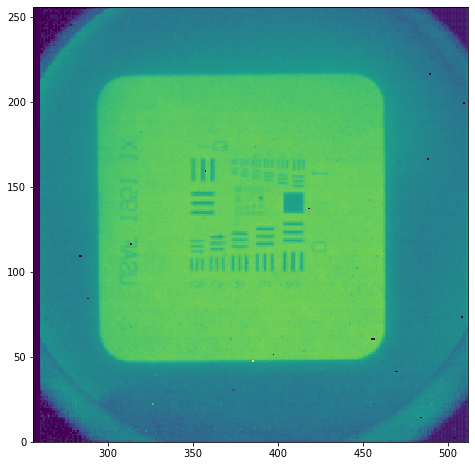

In [19]:
binsize=256
xedges = np.linspace(256, 512, binsize+1)
yedges = np.linspace(0, 256, binsize+1)
H, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges))
H = H.T
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(
#     H,
     np.log(H+1),
#       vmin=0, vmax=10,
    interpolation='nearest',
    origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
    cmap='viridis',
#     cmap="gray",
)

In [20]:
binsize=1024
xedges = np.linspace(0, binsize, binsize+1)
yedges = np.linspace(0, binsize, binsize+1)
H, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges))
H = H.T
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(
    # H,
    -np.log(H+1),
    interpolation='nearest',
    origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
    cmap="gray",
)
plt.close()

Text(0.5, 0, 'nhits')

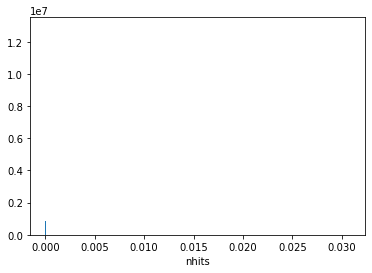

In [5]:
plt.figure()
_ = plt.hist(nhits*1e-6, 10000)
plt.xlabel("nhits")

In [6]:
filename_events = "/Users/fumiaki/Documents/ORNL/Research/Sophyread/mcpevent2hist-main/sophiread/build/data/Zeiss.hdf5"

with h5py.File(filename_events) as h5f:
    x = h5f["events/x"][:]
    y = h5f["events/y"][:]
    tof_ns = h5f["events/tof_ns"][:]
    nhits = h5f["events/NHits"][:]

/Users/fumiaki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'time-of-flight (ms)')

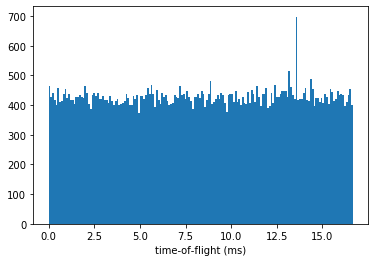

In [7]:
plt.figure()
_ = plt.hist(tof_ns*1e-6, 170)
plt.xlabel("time-of-flight (ms)")

In [8]:
# filename_events = "/Users/fumiaki/Documents/ORNL/Research/Sophyread/mcpevent2hist-main/sophiread/build/data/Zeiss.hdf5"
filename_events = "/Users/fumiaki/Documents/ORNL/Research/Sophyread/mcpevent2hist-main/sophiread/build/data/Navitar_hit.h5"

with h5py.File(filename_events) as h5f:
    x = h5f["hits/x"][:]
    y = h5f["hits/y"][:]
#     tof_ns = h5f["events/tof_ns"][:]
#     nhits = h5f["events/NHits"][:]

/Users/fumiaki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  after removing the cwd from sys.path.


In [9]:
len(x),len(y)

(173863742, 173863742)

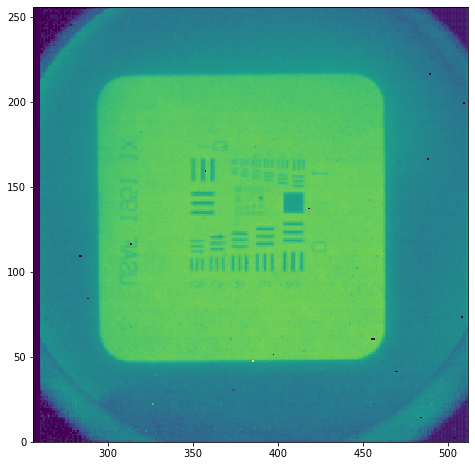

In [10]:
binsize=256
xedges = np.linspace(256, 512, binsize+1)
yedges = np.linspace(0, 256, binsize+1)
H, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges))
H = H.T
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(
#     H,
     np.log(H+1),
#       vmin=0, vmax=10,
    interpolation='nearest',
    origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
    cmap='viridis',
#     cmap="gray",
)

Text(0.5, 0, 'time-of-flight (ms)')

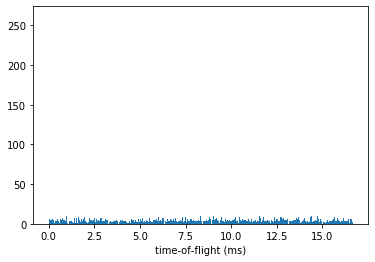

In [11]:
plt.figure()
_ = plt.hist(tof_ns*1e-6, 17000)
plt.xlabel("time-of-flight (ms)")

In [12]:
filename_events = "/Users/fumiaki/Documents/ORNL/Research/Sophyread/mcpevent2hist-main/sophiread/build/data/Zeiss.hdf5"

with h5py.File(filename_events) as h5f:
    x = h5f["events/x"][:]
    y = h5f["events/y"][:]
    tof_ns = h5f["events/tof_ns"][:]
    nhits = h5f["events/NHits"][:]

/Users/fumiaki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  This is separate from the ipykernel package so we can avoid doing imports until


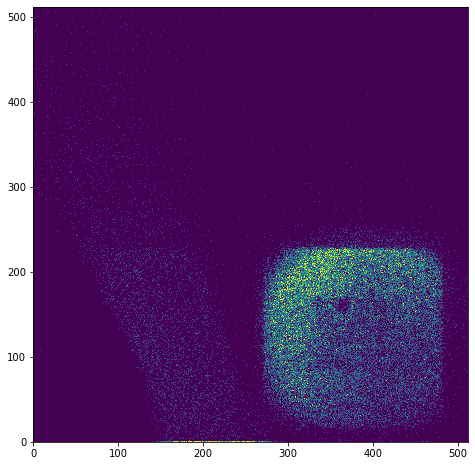

In [13]:
binsize=512
xedges = np.linspace(0, binsize, binsize+1)
yedges = np.linspace(0, binsize, binsize+1)
H, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges))
H = H.T
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(
    H,
#     -np.log(H+1),
    interpolation='nearest',
     vmin=0, vmax=6,
    origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
  cmap='viridis',
)

Text(0.5, 0, 'time-of-flight (ms)')

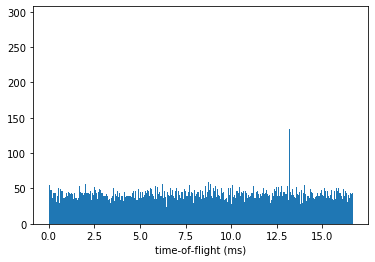

In [14]:
plt.figure()
_ = plt.hist(tof_ns*1e-6, 1700)
plt.xlabel("time-of-flight (ms)")